In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('block_0.csv', index_col = 'day')
dataset.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2012-10-12,MAC000002,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
2012-10-13,MAC000002,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2012-10-14,MAC000002,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
2012-10-15,MAC000002,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
2012-10-16,MAC000002,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [3]:
dataset.index = pd.to_datetime(dataset.index)

In [4]:
dataset.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2012-10-12,MAC000002,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
2012-10-13,MAC000002,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2012-10-14,MAC000002,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
2012-10-15,MAC000002,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
2012-10-16,MAC000002,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [5]:
one_house_sample = dataset[dataset['LCLid'] == 'MAC000002']
one_house_sample.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2012-10-12,MAC000002,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
2012-10-13,MAC000002,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2012-10-14,MAC000002,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
2012-10-15,MAC000002,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
2012-10-16,MAC000002,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


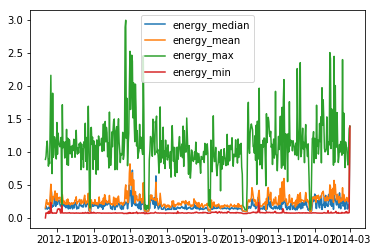

In [6]:
plt.plot(one_house_sample['energy_median'])
plt.plot(one_house_sample['energy_mean'])
plt.plot(one_house_sample['energy_max'])
plt.plot(one_house_sample['energy_min'])
plt.legend(loc = 'best')

In [7]:
description = dataset.describe()

In [8]:
description

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,25574.000000,25574.000000,25574.000000,25574.000000,25496.000000,25574.000000,25574.000000
mean,0.366426,0.450346,1.348149,47.807148,0.282705,21.543821,0.167271
std,0.407172,0.421025,0.910607,2.771494,0.201086,20.205007,0.255782
min,0.007000,0.012000,0.012000,1.000000,0.002499,0.012000,0.000000
25%,0.145500,0.213896,0.732000,48.000000,0.138956,10.231000,0.050000
50%,0.231500,0.318958,1.173000,48.000000,0.243201,15.260000,0.091000
75%,0.406500,0.528979,1.762000,48.000000,0.384356,25.332750,0.159000
max,5.522000,5.791125,8.170999,48.000000,2.557372,277.973999,5.052000


In [10]:
housecount = dataset.groupby('day')[['LCLid']].nunique()
housecount.head()

,LCLid
day,
2011-12-03,1
2011-12-04,1
2011-12-05,1
2011-12-06,1
2011-12-07,1


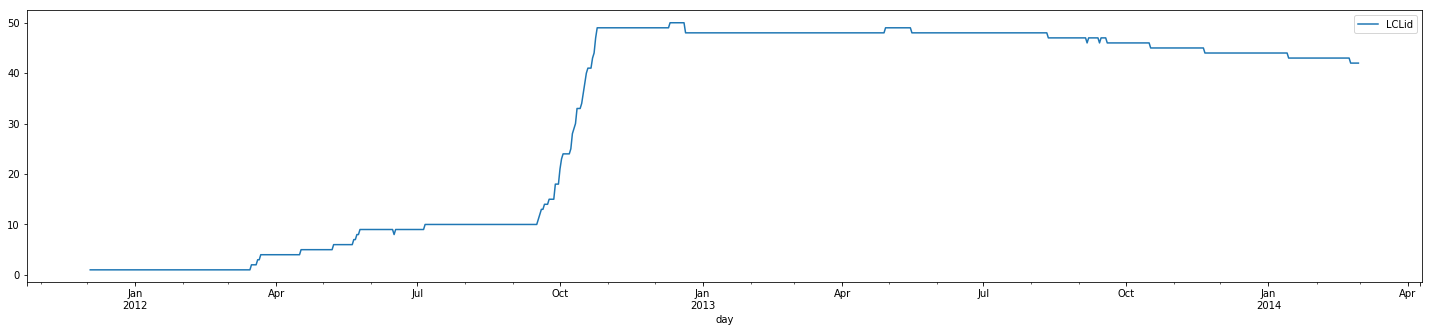

In [11]:
housecount.plot(figsize=(25,5))

In [12]:
housecount.shape

(819, 1)

In [13]:
energy = dataset.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()

In [14]:
energy.head()

,day,energy_sum,LCLid
0,2011-12-03,9.007,1
1,2011-12-04,20.763,1
2,2011-12-05,6.020,1
3,2011-12-06,13.322,1
4,2011-12-07,9.062,1


In [15]:
energy.count()

day           819
energy_sum    819
LCLid         819
dtype: int64

In [16]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [17]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-12-03
Ending Point of Data at Day Level 2014-02-28


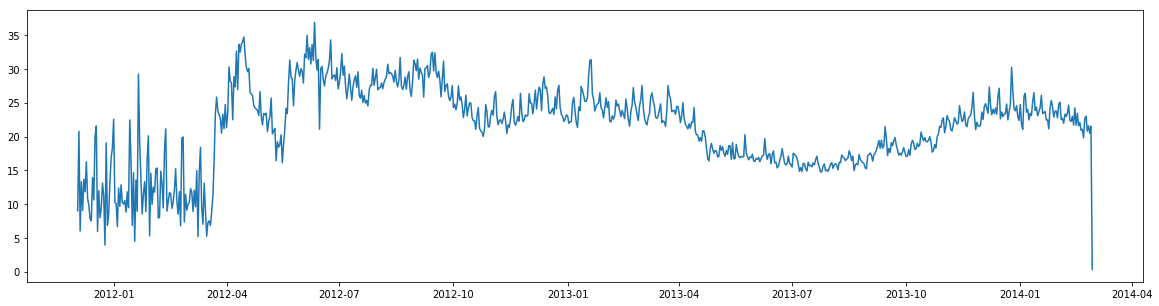

In [18]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(energy.day, energy.avg_energy)

In [22]:
dataset.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,25574.000000,25574.000000,25574.000000,25574.000000,25496.000000,25574.000000,25574.000000
mean,0.366426,0.450346,1.348149,47.807148,0.282705,21.543821,0.167271
std,0.407172,0.421025,0.910607,2.771494,0.201086,20.205007,0.255782
min,0.007000,0.012000,0.012000,1.000000,0.002499,0.012000,0.000000
25%,0.145500,0.213896,0.732000,48.000000,0.138956,10.231000,0.050000
50%,0.231500,0.318958,1.173000,48.000000,0.243201,15.260000,0.091000
75%,0.406500,0.528979,1.762000,48.000000,0.384356,25.332750,0.159000
max,5.522000,5.791125,8.170999,48.000000,2.557372,277.973999,5.052000


In [26]:
dataset[dataset['energy_sum'] == 0.012000]

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2013-09-05,MAC003422,0.012,0.012,0.012,1,NaN,0.012,0.012
2013-09-11,MAC003422,0.012,0.012,0.012,1,NaN,0.012,0.012
2013-09-13,MAC003422,0.012,0.012,0.012,1,NaN,0.012,0.012


In [28]:
suspicious = dataset.loc['2013-09-01': '2013-10-01']

In [29]:
suspicious.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2013-09-01,MAC000002,0.1365,0.167750,1.130,48,0.153799,8.052,0.074
2013-09-02,MAC000002,0.1405,0.189667,0.769,48,0.143387,9.104,0.075
2013-09-03,MAC000002,0.1065,0.119208,0.663,48,0.084431,5.722,0.069
2013-09-04,MAC000002,0.1060,0.105646,0.190,48,0.024965,5.071,0.067
2013-09-05,MAC000002,0.1050,0.105271,0.168,48,0.027425,5.053,0.065


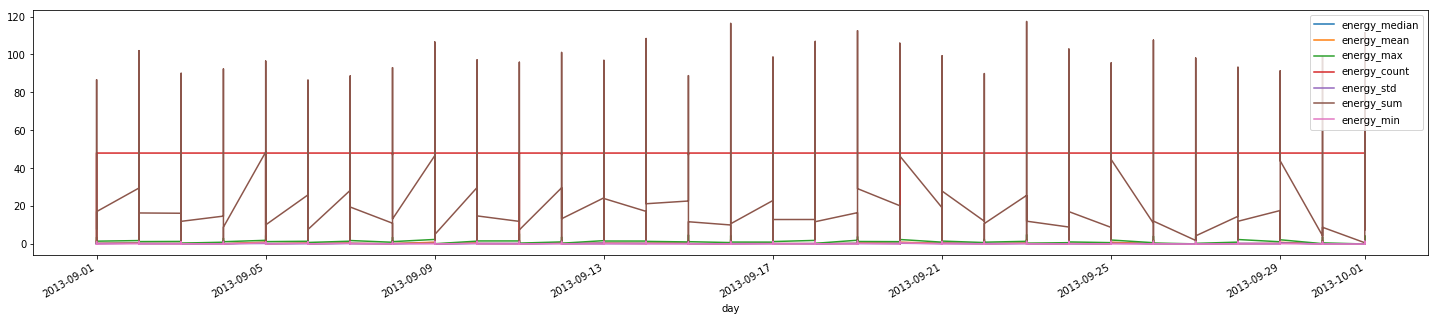

In [30]:
suspicious.plot(figsize = (25, 5))

In [32]:
house = suspicious.groupby('day').nunique()
house.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2013-09-01,47,46,47,45,2,46,47,44
2013-09-02,47,47,47,47,2,47,47,43
2013-09-03,47,47,47,47,1,47,47,42
2013-09-04,47,46,47,47,1,47,47,44
2013-09-05,47,47,47,46,2,46,47,45


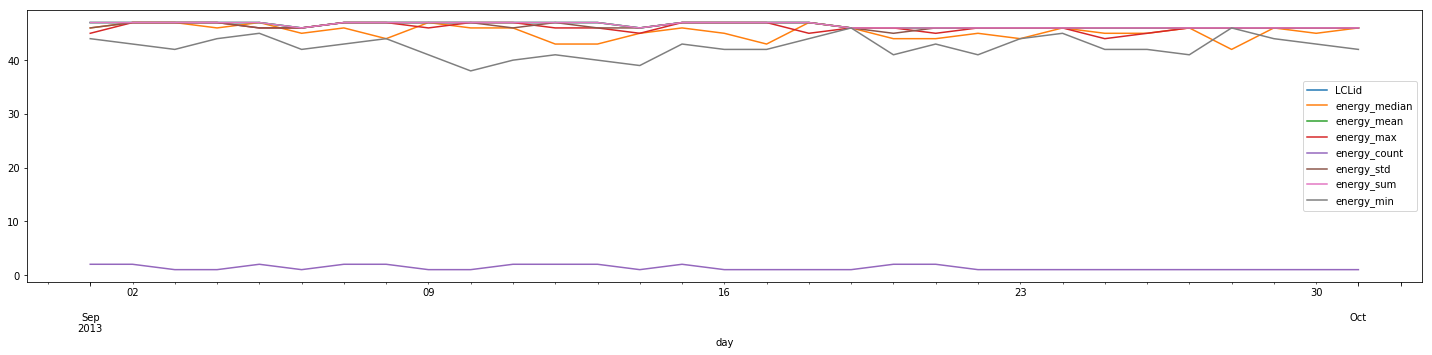

In [33]:
house.plot(figsize = (25, 5))

In [34]:
total = suspicious.groupby('LCLid').nunique()
total.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
LCLid,,,,,,,,
MAC000002,1,31,31,31,1,31,31,19
MAC000246,1,29,31,31,1,31,31,18
MAC003223,1,30,31,31,1,31,31,17
MAC003239,1,23,31,28,1,31,31,12
MAC003252,1,31,31,31,1,31,31,20


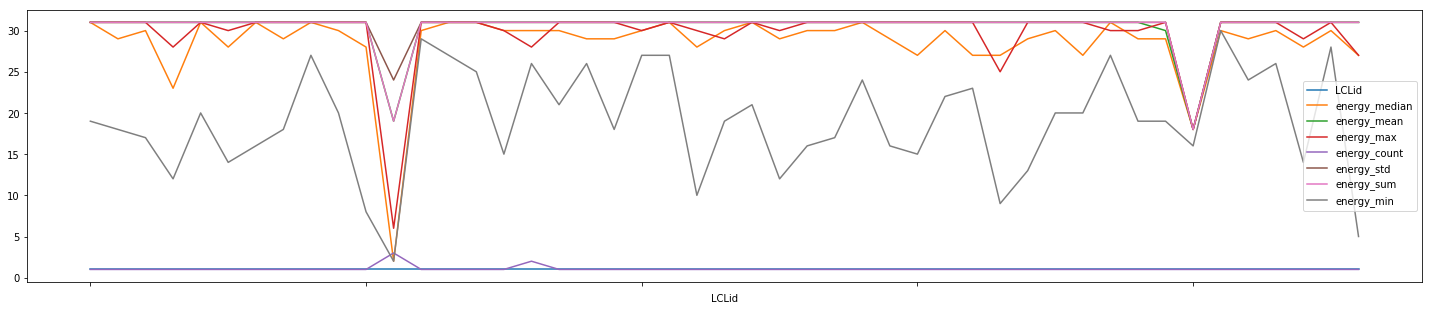

In [35]:
total.plot(figsize = (25, 5))

In [45]:
total = total.drop('LCLid', axis = 1)
total.head()
total.to_csv('suspicious.csv')